## Imports

### Read in Simulator.py file

In [40]:
import Simulator
from importlib import reload
reload(Simulator)
from Simulator import DataImporter, GenCustProd, SalesGenerator

# Data Setup
- The following .csv files must be placed within a folder 'Data' within the current working directory 
    - GenderNeutralNames.csv
    - LastNames.csv
    - uszips.csv
- Run the bellow cells to view the possible options of Names (First and Last) and zip codes that comprise the customers table that will be generated shortly during the simulation.

In [41]:
data_importer = DataImporter()
#data_importer.import_first() # file_name="file.csv"

In [42]:
first_names = data_importer.first
first_names[0:10]

['Addison',
 'Adrian',
 'Aiden',
 'Ainsley',
 'Alex',
 'Alfie',
 'Ali',
 'Amory',
 'Andie',
 'Andy']

In [43]:
last_names = data_importer.last
last_names[0:10]

['Smith',
 'Johnson',
 'Williams',
 'Jones',
 'Brown',
 'Davis',
 'Miller',
 'Wilson',
 'Moore',
 'Taylor']

In [44]:
zips = data_importer.zip
zips[0:10]

['01001',
 '01002',
 '01003',
 '01005',
 '01007',
 '01008',
 '01009',
 '01010',
 '01011',
 '01012']

# GenCustProd
- This class generates Customers and Products
- This process is automatically run in the following SalesGenerator function, but it allows you to change the default parameters if you so choose for the purpose of the simulation.
    ### Variables
    - **num_cust** 
        - an integer
        - how many customers does the store have
        - this includes anyone who made a sale in the history of the store
    - **num_prod**
        - an integer
        - how many distinct items/products are sold in the store
    - **categories**
        - a list of strings
        - contains different product types or groupings
    - **means**
        - a list of integers
        - corresponds to the average sales price for each category listed in 'categories' variable
        - The means list is aligned with the categories list in the same order
    - **st_dev**
        - a list of percentages as decimals
        - corresponds to the standard deviation of sales prices for each category listed in 'categories' variable
        - The st_dev list is aligned with the categories list in the same order
    - **sale_pct**
        - a percentage as a decimal
        - This variable denotes the percentage of products available for sale. 
        - In this case, it is set to 0.2, meaning that 20% of the total available products will be put on sale.
    - **display_pct**
        - a percentage as a decimal
        - This variable represents the percentage of products to be displayed.
        - With a value of 0.1, it indicates that 10% of the total available products will be displayed for customers to view or purchase.
        - This is the percentage of products that are on end caps, in the checkout isle, or highlighted throughout a display.
    - **random_seed**
        - an integer
        - This is the seed value used to initialize the random number generator. 
        - It ensures reproducibility of random processes or simulations by seeding the random number generator with a specific value (in this case, 42).
        - When the same seed is used, it generates the same sequence of random numbers, aiding in result reproducibility.
        
## Use the below line to generate a new customer product group

Data saved to Data\customers.csv
Data saved to Data\products.csv


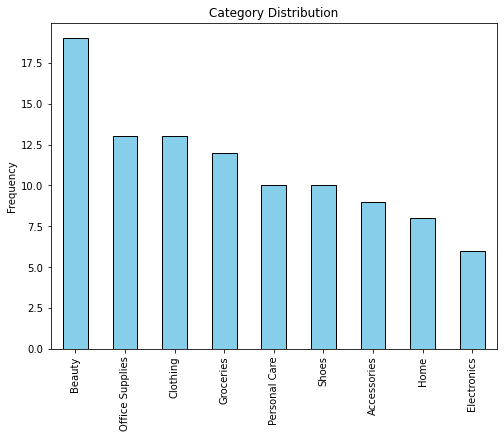

In [45]:
cust_prod = GenCustProd(num_cust = 100,
                        num_prod = 100,
                        categories = ['Clothing', 'Shoes','Accessories','Home','Beauty','Personal Care','Office Supplies','Electronics','Groceries'], 
                        means = [30,40,25,60,20,10,10,150,5],
                        st_dev = [10,10,20,30,10,5,5,40,2],
                        sale_pct = .2,
                        display_pct = .1,
                        random_seed = 42,
                       data_importer = data_importer)

# SalesGenerator
- This class is designed to simulate and generate sales transactions over a specified number of periods, typically days, for a given set of customers and products.

### Initialization:

- **Variables Initialization:** 
    - It initializes various variables including the number of periods, start date, and simulation-related flags.
- **Custom Product Instance:**
    - It allows for the instantiation of a custom product instance or uses a default one (GenCustProd) if none is provided.
- **Simulation Number:**
    - It identifies the next simulation number based on previous saved simulation files.
- **Data Storage Setup:**
    - It initializes variables to store sales transaction data.

### Helper Functions:
- **Extract Number from String:**
    - It extracts numeric values from strings using regular expressions, specifically designed to retrieve simulation numbers from filenames.

### File Handling:
- **Get Most Recent Simulation Number:** 
    - It scans the 'Data' directory to identify the most recent simulation number from saved files.
- **Save Output with Simulation Number:**
    - It saves transactions and transaction details to CSV files with filenames indicating the simulation number and the count of transactions.

### Sales Generation:
- **Generate Sales Data:**
    - It simulates sales transactions over the specified number of periods (typically days).
- **Sales Simulation Loop:**
    - It iterates through each day and simulates sales transactions based on various factors:
- **Base Sales Simulation:** 
    - Generating a base sales count with random noise and economic condition fluctuations.
- **Customer Purchase Simulation:** 
    - Simulating customer purchases based on spending habits, available products, sales, and display probabilities.
- **Transaction Recording:** 
    - Recording transactions with transaction IDs, customer IDs, purchase times, and total prices.
- **Transaction Detail Recording:** 
    - Recording details of purchased products within each transaction.
- **Periodic Saving:** 
    - Saving intermediate transaction data in temporary files when a certain threshold of transactions is reached.

### Finalization:
- **Data Saving:** 
    - Saving the final sales transaction data into CSV files for both transactions and transaction details.


# Generate Sales with defualt cust_prod settings
- for testing it is ideal to keep num_periods small to avoid long running times
- cust_prod should be none if you are using default cust_prod settings

C:\Users\Stephanie\Documents\School\8_Fall_2023\2_Automation_Workflows\Automation_Final_Project\Simulator.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continental_zips_df['zip_6'] = continental_zips_df['zip'].apply(lambda x: '{:05}'.format(x)) #astype(str).str.zfill(5)


Data saved to Data\customers.csv
Data saved to Data\products.csv


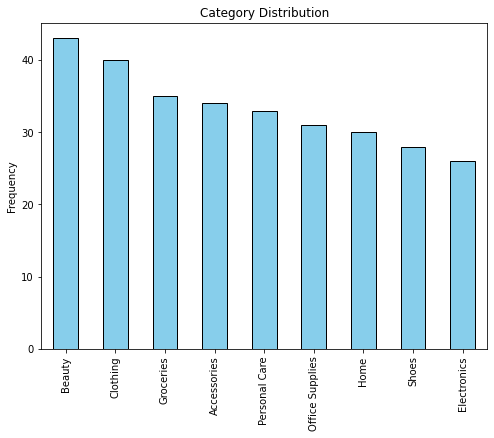

2022-01-01 00:00:00
2022-01-02 00:00:00
2022-01-03 00:00:00
2022-01-04 00:00:00
2022-01-05 00:00:00
Data saved to Data\Simulations\transactions_s3_494.csv
Data saved to Data\Simulations\transactions_details_s3_4371.csv
saved files


In [46]:
SalesGenerator(num_periods = 5,
                start_year=2022,
                start_month = 1,
                start_day = 1,
                del_previous_sims = False,
                cust_prod = None)

# Generate sales with a modified customer product instance
- based on cust_prod created above

In [47]:
SalesGenerator(num_periods = 2,
                start_year=2022,
                start_month = 1,
                start_day = 1,
                del_previous_sims = False, # True, False, [#,#,#]
                cust_prod = cust_prod)

2022-01-01 00:00:00
2022-01-02 00:00:00
Data saved to Data\Simulations\transactions_s4_212.csv
Data saved to Data\Simulations\transactions_details_s4_1690.csv
saved files


## Now the files are saved in the simulation folder